# Read Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
A = pd.read_csv("C:Documents/Google_Stock_Price_Train.csv")

In [2]:
A.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# check missing data

In [3]:
A.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# get Stock opening Price

In [4]:
trd = A[["Open"]].values

# Use MinMaxScaler to scale our data between 0 and 1

In [5]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
trd_scaled = mm.fit_transform(trd)

In [6]:
trd_scaled.shape

(1258, 1)

# initialized data into xtrain and ytrain
we want to predict 61st value of stock price
the first entry in the xtrain would be an array of first 60 open stock price and first entry in ytrain would be 61st value of open stock price

In [7]:
xtrain = []
ytrain = []
for i in range(60,1258,1):
    xtrain.append(trd_scaled[i-60:i])
    ytrain.append(trd_scaled[i:i+1,0])

In [8]:
type(xtrain)

list

In [9]:
import numpy as np

In [10]:
xtr = np.array(xtrain) # xtrain and ytrain in the from of list using numpy library we convert into array
ytr = np.array(ytrain)

In [11]:
xtr.shape

(1198, 60, 1)

In [12]:
ytr.shape

(1198, 1)

# Creat the Model

In [13]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [14]:
nn = Sequential()
nn.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50, return_sequences = True))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50, return_sequences = True))
nn.add(Dropout(0.2))

nn.add(LSTM(units = 50))
nn.add(Dropout(0.2))

nn.add(Dense(units = 1))

In [15]:
nn.compile(optimizer = 'adam', loss = 'mean_squared_error')
nn.fit(xtr,ytr,epochs=100)

Epoch 1/100
38/38 [==============================] - 16s 131ms/step - loss: 0.0395
Epoch 2/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0045
Epoch 13/100

In [16]:
d = nn.predict(xtr)

In [17]:
d

array([[0.09927391],
       [0.10111974],
       [0.10230485],
       ...,
       [0.9229605 ],
       [0.9242383 ],
       [0.92149   ]], dtype=float32)

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytr,d)

0.019217943668628994

In [19]:
c = pd.DataFrame(mm.inverse_transform(ytr))

In [20]:
c["1"] = pd.DataFrame(mm.inverse_transform(d))

In [21]:
c

,0,1
0,325.50,332.485687
1,324.66,333.477936
2,319.19,334.114990
3,321.50,333.726532
4,318.03,332.617798
...,...,...
1193,790.90,775.983093
1194,790.68,775.598328
1195,793.70,775.266602
1196,783.33,775.953552


# read the tst data

In [23]:
B = pd.read_csv("C:Documents/Google_Stock_Price_Test.csv")
B.head()
real_stock_price = B[["Open"]]

# check missing values in test data

In [24]:
B.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [25]:
B.shape

(20, 6)

In [26]:
tsd = pd.concat([A,B])
tsd.index = range(0,1278)

In [27]:
tsd.shape

(1278, 6)

In [28]:
tsd = tsd[["Open"]].values

# Use MinMaxScaler to scale our test data between 0 and 1

In [29]:
tsd_scaled = mm.fit_transform(tsd)

In [30]:
tsd_scaled.shape

(1278, 1)

# initialized data into xtest

In [31]:
xtest = []
for i in range(1258,1278,1):
    xtest.append(tsd_scaled[i-60:i])

In [32]:
type(xtest)

list

In [33]:
xts = np.array(xtest) #xtest in the from of list using numpy library we convert into array

In [34]:
xts.shape

(20, 60, 1)

In [35]:
test_predication = nn.predict(xts)

# make Predication Using Model

In [36]:
L = pd.DataFrame(mm.inverse_transform(test_predication))

In [37]:
L

,0
0,773.440063
1,770.616272
2,770.752014
3,772.033142
4,775.323303
5,781.186096
6,786.565796
7,788.787659
8,789.135986
9,788.814209


In [38]:
B["Pred"] = L

In [39]:
B

,Date,Open,High,Low,Close,Volume,Pred
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300",773.440063
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000",770.616272
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200",770.752014
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200",772.033142
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400",775.323303
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800",781.186096
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900",786.565796
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100",788.787659
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200",789.135986
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100",788.814209


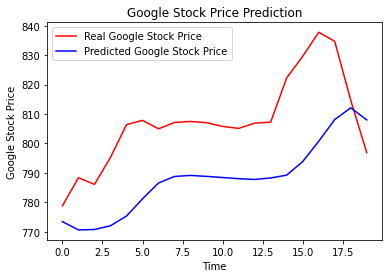

In [40]:
# Visualising the results
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(L, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()